# Imports and Functions

In [1]:
from sunlab.environment.base.cpu import *
from sunlab.environment.base.extras import *
from sunlab.globals import FILES
from sunlab.sunflow import *

In [2]:
import seaborn as sns

# Setup

In [3]:
model, training_dataset = load_aae_and_dataset(FILES['TRAINING_DATASET'], FILES['PRETRAINED_MODEL_DIR'], MaxAbsScaler)

In [4]:
training_data = process_and_load_dataset(FILES['TRAINING_DATASET'], FILES['PRETRAINED_MODEL_DIR'])

# Runtime Parameters

In [5]:
SAVE_EXTRAS = False

In [6]:
g_Base = lambda *args: DIR_ROOT + "Figures/Data/"

# Plots

In [7]:
XYM = np.load(DIR_ROOT + "extra_data/OutlineXYM.npy")
XYM.shape

(4, 800, 800)

In [8]:
non_phys_data = np.load(f"{DIR_ROOT}extra_data/NonPhysicalMask.npy", allow_pickle=True).item()
non_phys_data.keys()

dict_keys(['mask', 'xrange', 'yrange', 'XY'])

In [9]:
mask = np.repeat(np.isnan(non_phys_data['mask'])[...,np.newaxis],13, axis=-1)
assert (mask[...,0] == mask[...,1]).all()

In [10]:
XY = non_phys_data['XY']
XY.shape

(500, 500, 2)

In [11]:
decoded = model.decoder(XY.reshape((-1,2))).numpy().reshape((XY.shape[0],XY.shape[1],13))
decoded = np.ma.masked_where(mask.transpose(1,0,2), decoded)

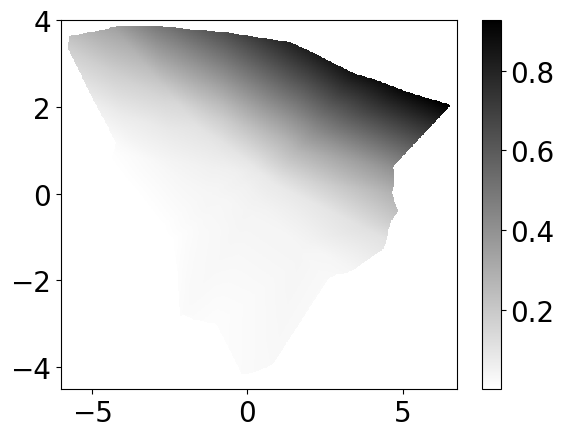

In [15]:
for _I in range(13):
    plt.imsave(g_Base() + f"Component-{training_dataset.data_columns[_I]}.pdf",
               decoded[...,_I].T,
               cmap='gray_r',
               origin='lower')
#     plt.pcolor(XY[...,0], XY[...,1], decoded[...,_I], cmap='gray_r')
#     plt.colorbar()
#     plt.xlabel(training_dataset.data_columns[_I])
#     if SAVE_EXTRAS:
#         plt.save(g_Base() + f"Component-{training_dataset.data_columns[_I]}")
#     plt.close()
_=_

# END